## train results visualization

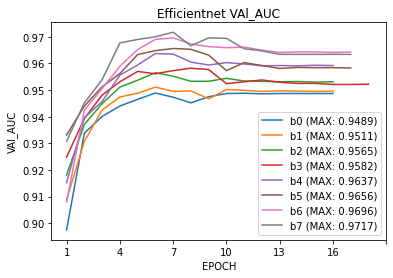

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

models = { 'b0': 0, 'b1': 0, 'b2': 0, 'b3': 0, 'b4': 0, 'b5': 0, 'b6': 0, 'b7': 0} # 모델별 학습값 저장할 dict
a = list(models.keys()) # 그래프 라벨용
e = list(range(1, 19,3)) # 그래프 X축
for k in a:
    f = open(k+".txt") # log 파일 불러오기
    data = f.read() # 불러온 내용 저장

    dic = { 'loss':[], 'auc':[], 'val_loss':[], 'val_auc':[] } # log 내 값을 저장할 dict
    target = [' loss: ', ' auc: ', 'val_loss: ', 'val_auc: '] # 필요한 값을 찾을때 사용할 문자
    index = -1
    for t in target:
        while True:
            index = data.find(t, index + 1)
            if index == -1: # 찾은 단어들 중 마지막이면 loop 탈출
                break
            if t == target[0]:
                dic["loss"].append(float(data[index + 6: index + 13]))
            elif t == target[1]:
                dic["auc"].append(float(data[index + 5: index + 12]))
            elif t == target[2]:
                dic["val_loss"].append(float(data[index + 10: index + 16]))
            elif t == target[3]:
                dic["val_auc"].append(float(data[index + 9: index + 15]))

    # for i in dic.keys(): # 마지막 값으로 길이 늘리기
    #     for j in range(20-len(dic[i])):
    #         dic[i].append(dic[i][-1])
    

    models[k] = dic
    # plt.scatter(models[k]['auc'].index(max(models[k]['auc'])), max(models[k]['auc'])) # 최고값 점찍기
    plt.plot(models[k]['val_auc'], label=k+" (MAX: "+ str(max(models[k]['val_auc'])) +")") # 그래프 그리기
    # plt.plot(models[k]['auc'], '--',label=k+" (MAX: "+ str(max(models[k]['auc'])) +")") # 점선으로 그리기
    plt.xticks(np.arange(0, 20, step=3), e) # x축 범주 설정
    # plt.xlim(1, 18) # x축 범주 설정
    # plt.ylim(0.86, 1.0) # y축 범주 설정
    f.close()

plt.title("Efficientnet VAl_AUC") 
plt.ylabel("VAl_AUC")
plt.xlabel("EPOCH")
plt.legend(loc='lower right')
plt.show()